In [1]:
%matplotlib inline
import pylab as plt
from astropy.io import fits
import source_extracting
import diff_image
from IPython.display import Image
from matplotlib import animation

/Users/tinapeters/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
file = "../ELAISN1_MOS15-09_NUV.fits"
hdulist = fits.open(file)
framecube = hdulist[0].data
pngout = "../ELAISN1_MOS15-09_NUV_detsources"

In [3]:
image, bad_frame_mask, frame_wcs = diff_image.diff_image(file)
print image.shape
print bad_frame_mask
print framecube.shape
print framecube[~bad_frame_mask].shape

(120, 71)
[ True False False False  True  True False False False False False False
 False False False False False False  True False  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False]
(45, 120, 71)
(39, 120, 71)


In [4]:
unique_extracted_objects = source_extracting.find_all_objects(framecube[~bad_frame_mask], bad_frame_mask, frame_wcs, pngout)
print len(unique_extracted_objects)

8


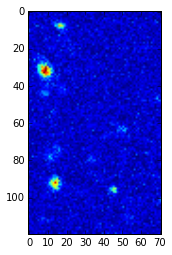

In [5]:
plt.imshow(framecube[2,:,:])

In [6]:
files = []
for i in range(len(framecube[~bad_frame_mask])):
    fname=pngout + str(i) + ".png"
    files.append(fname)